El dataset contiene caracteristicas diferentes para medir la calidad del agua, entre esas caracteristicas, se encuentran el PH, la dureza, el TDS que mide que los minerales disueltos en el agua, las cloraminas o desinfectantes, el nivel de sulfato, conductividad, nivel de carbón organico, nivel de trihalometano, nivel de turbiedad y finalmente, potabilidad. Todas las variables mencionadas anteriormente, se consideran importantes de analizar debido a que suministran información importante para saber si encuentra entre los rangos aceptables para consumo humano. Como objetivo de este analisis al dataset, se puede plantear analizar cuantos de los cuerpos registrados cumplirian las caracteristicas para consumo, analizar cuantos de esos son potables, comparar la cantidad de cuerpos aptos para consumo y los que no lo son. 

Preguntas a responder:
 -¿Que porcentaje de las muestras son potables y no potables?
 -¿Cuantos registros no cumplen con los rangos de valores establecidos como consumibles?
 -identificar que variables tienen mas peso para determinar si el agua es potable o no

##Preprocesamiento 


In [21]:
##Se importan las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
## Cargamos el dataset
df = pd.read_csv('water_potability.csv')

##Visualizar la cantidad de registros y columnas del dataset
print(f"El dataset tiene {df.shape}")

##Visualizar las primeras filas del dataset
print(f"Primeras filas del dataset:\n{df.head(10)}")




El dataset tiene (3276, 10)
Primeras filas del dataset:
          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potab

In [23]:

##Visualizar las estadísticas descriptivas del dataset
print("---------------------------------------------")
print(f"Estadísticas descriptivas del dataset:\n{df.describe()}")


---------------------------------------------
Estadísticas descriptivas del dataset:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.39011

In [24]:

##Validamos datos nulos y duplicados
print(f"Datos nulos:\n{df.isnull().mean()*100}")

print("---------------------------------------------")
print(f"Datos duplicados:\n{df.duplicated().sum()}")



Datos nulos:
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64
---------------------------------------------
Datos duplicados:
0


Teniendo un contexto general, se procede ahora a realizar graficas de las variables con el fin de conocer como están distribuidas antes de empezar a hacer modificaciones.


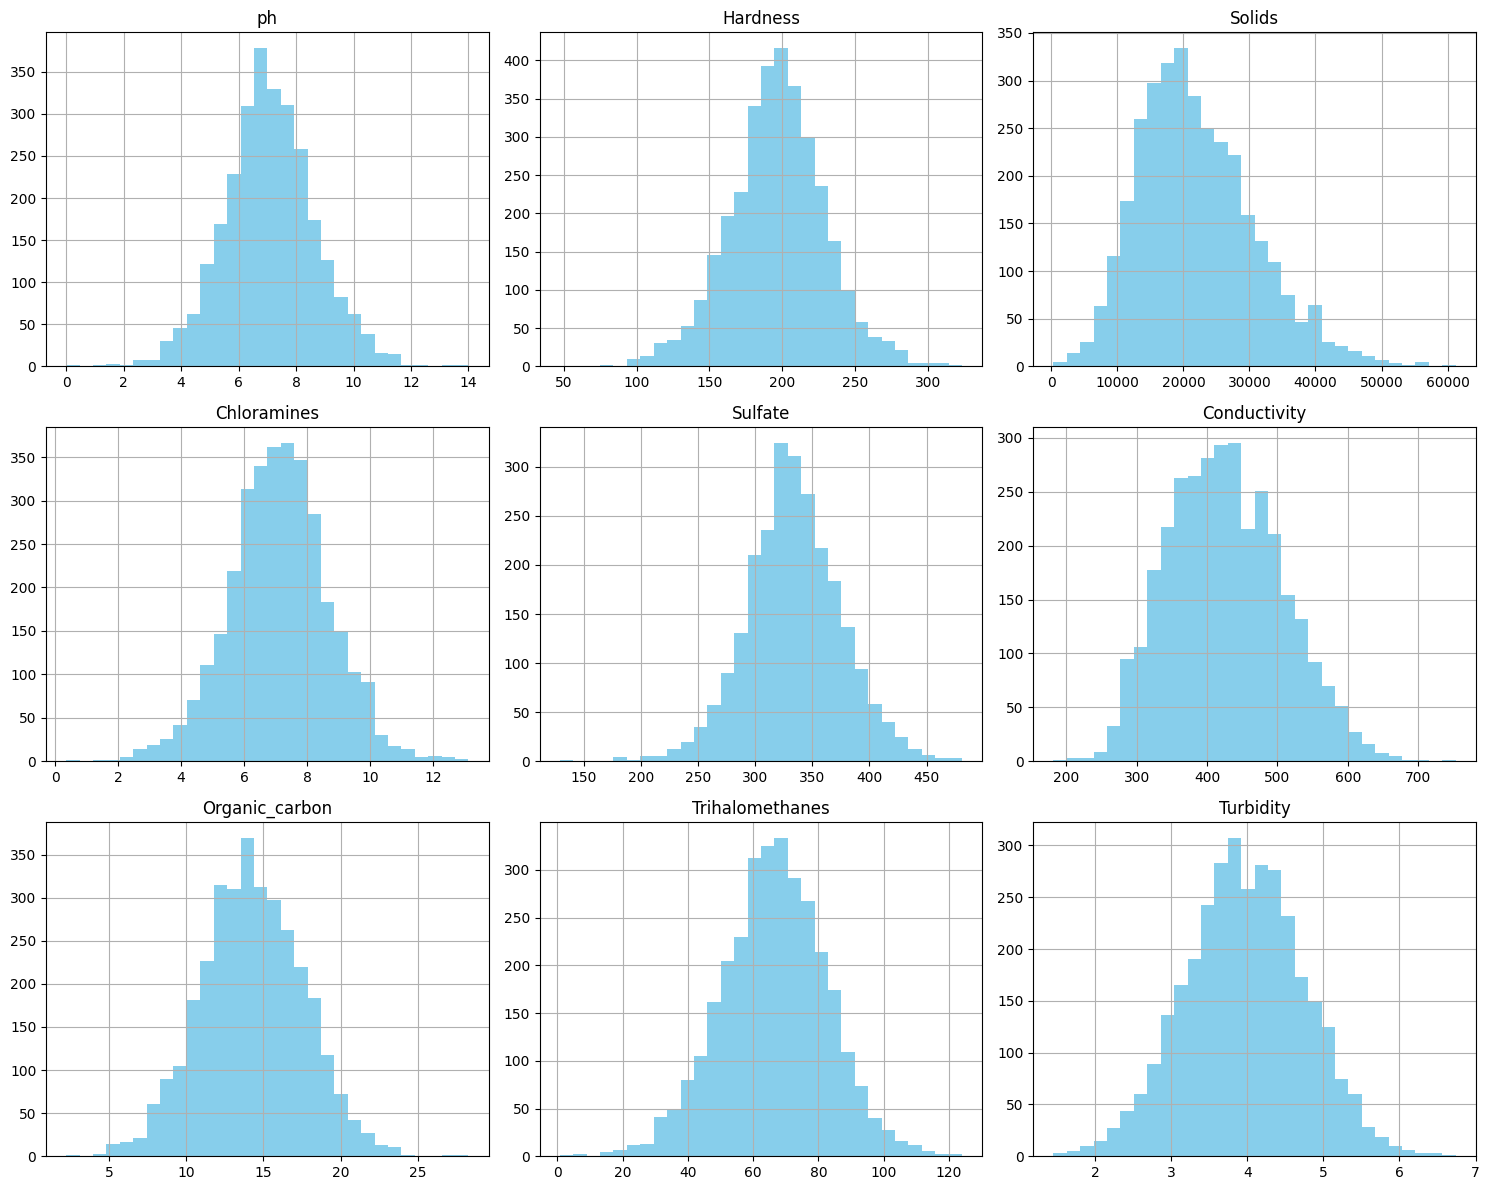

In [25]:
##Se exploran otras variables numericas mediante histograma con el fin de saber como estan distribuidos los datos


numeric_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

df[numeric_cols].hist(bins=30, figsize=(15,12), color='skyblue')
plt.tight_layout()
plt.show()

En terminos generales, la distribución de los datos en las variables numericas principales no tiene un sesgo muy evidente, a excepción de la variable Solids o TDS, que si demuestra una mayor concentración hacia el lado izquierdo, lograndose interpretar que cuenta con muchos valores menores que con valores grandes. Los datos no tienen una forma de campana perfecta, pero a pesar de esto no tienen una distribución demasiado sesgada.

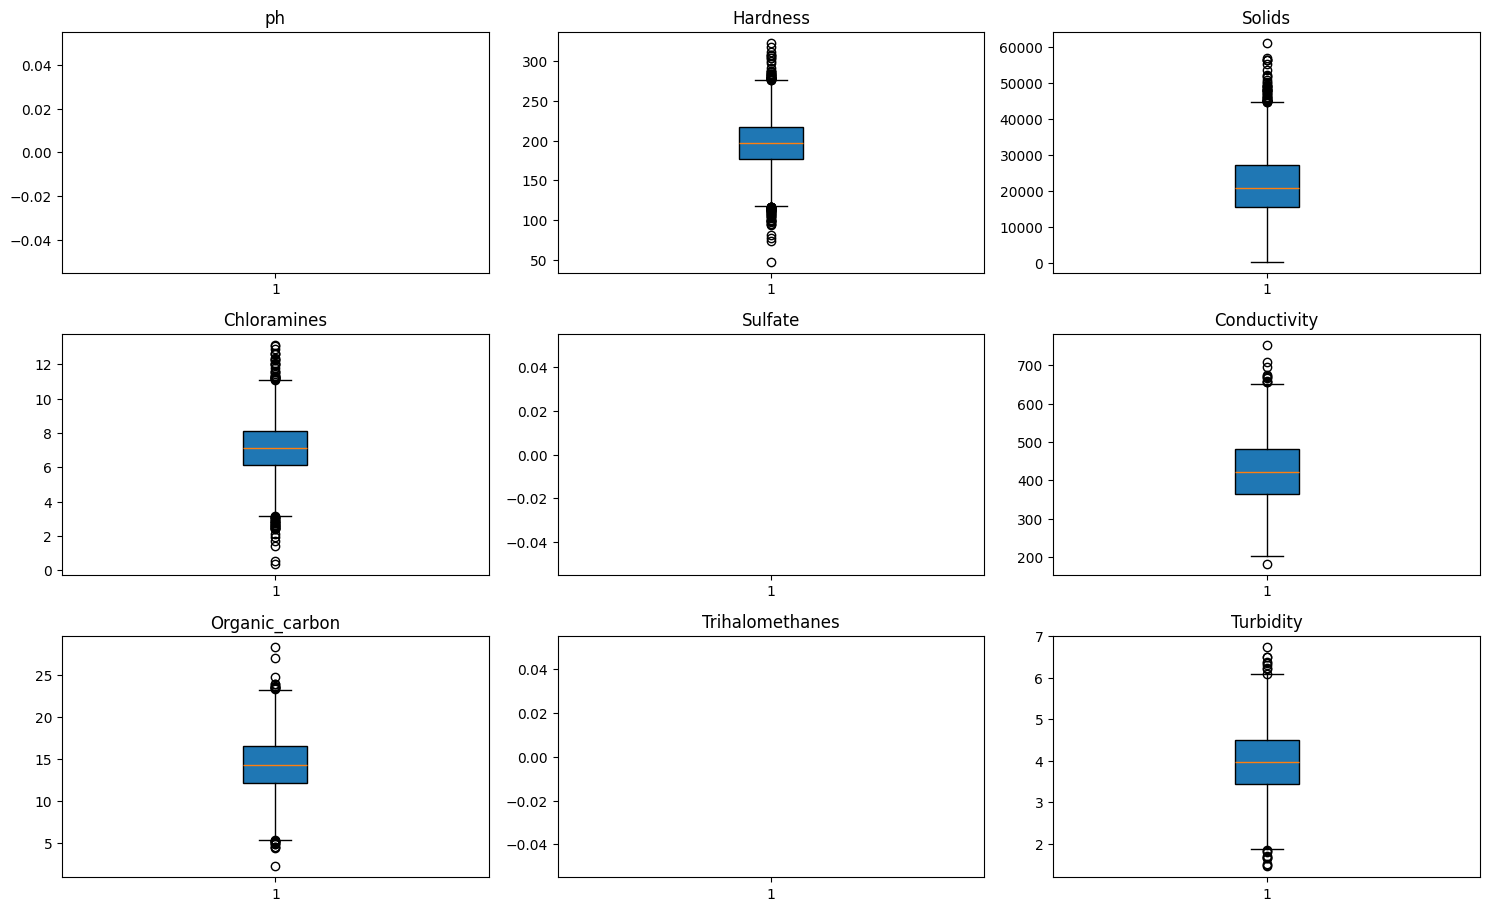

In [26]:

# Crear subplots
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)  # 4 filas, 3 columnas
    plt.boxplot(df[col], vert=True, patch_artist=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Al momento de analizar los boxplot de las diferentes variables, se puede evidenciar que para las columnas con datos faltantes sin importar en que medida, no lo grafica, por lo que será necesario entrar a tomar acciones con los datos faltantes tomando a consideración la cantidad. Respecto a las variables que se lograron graficar, se puede observar que en general todas tienen valores fuera de los limites, de hecho en general las variables cuentan sobretodo con datos muy grandes que se detectan como anomalos en los boxplot, la variable que parece ser mas estandar es "conductivity" y "organic_carbon". 

Retomando el aspecto de valores nulos, debido al porcentaje tan representativo para PH y para Sulfato, lo mejor y más viable es imputar datos con el valor de la mediana, de esta manera no afectamos la distribución de los datos y evitamos tomar valores extremos.

In [27]:
## Imputar los faltantes con la mediana de cada columna
df = df.fillna(df.median(numeric_only=True))

## Verificar que ya no haya nulos
print("---------------------------------------------")
print("Valores nulos después de imputar:")
print(df.isna().sum())

---------------------------------------------
Valores nulos después de imputar:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Volvemos a revisar el describe para validar que cambio han tenido los datos ahora que se han eliminado en totalidad los nulos en todas las variables

In [28]:
##Visualizar las estadísticas descriptivas del dataset despues del proceso de imputacion
print("---------------------------------------------")
print(f"Estadísticas descriptivas del dataset:\n{df.describe()}")

---------------------------------------------
Estadísticas descriptivas del dataset:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.407478     3.966786     0.39011

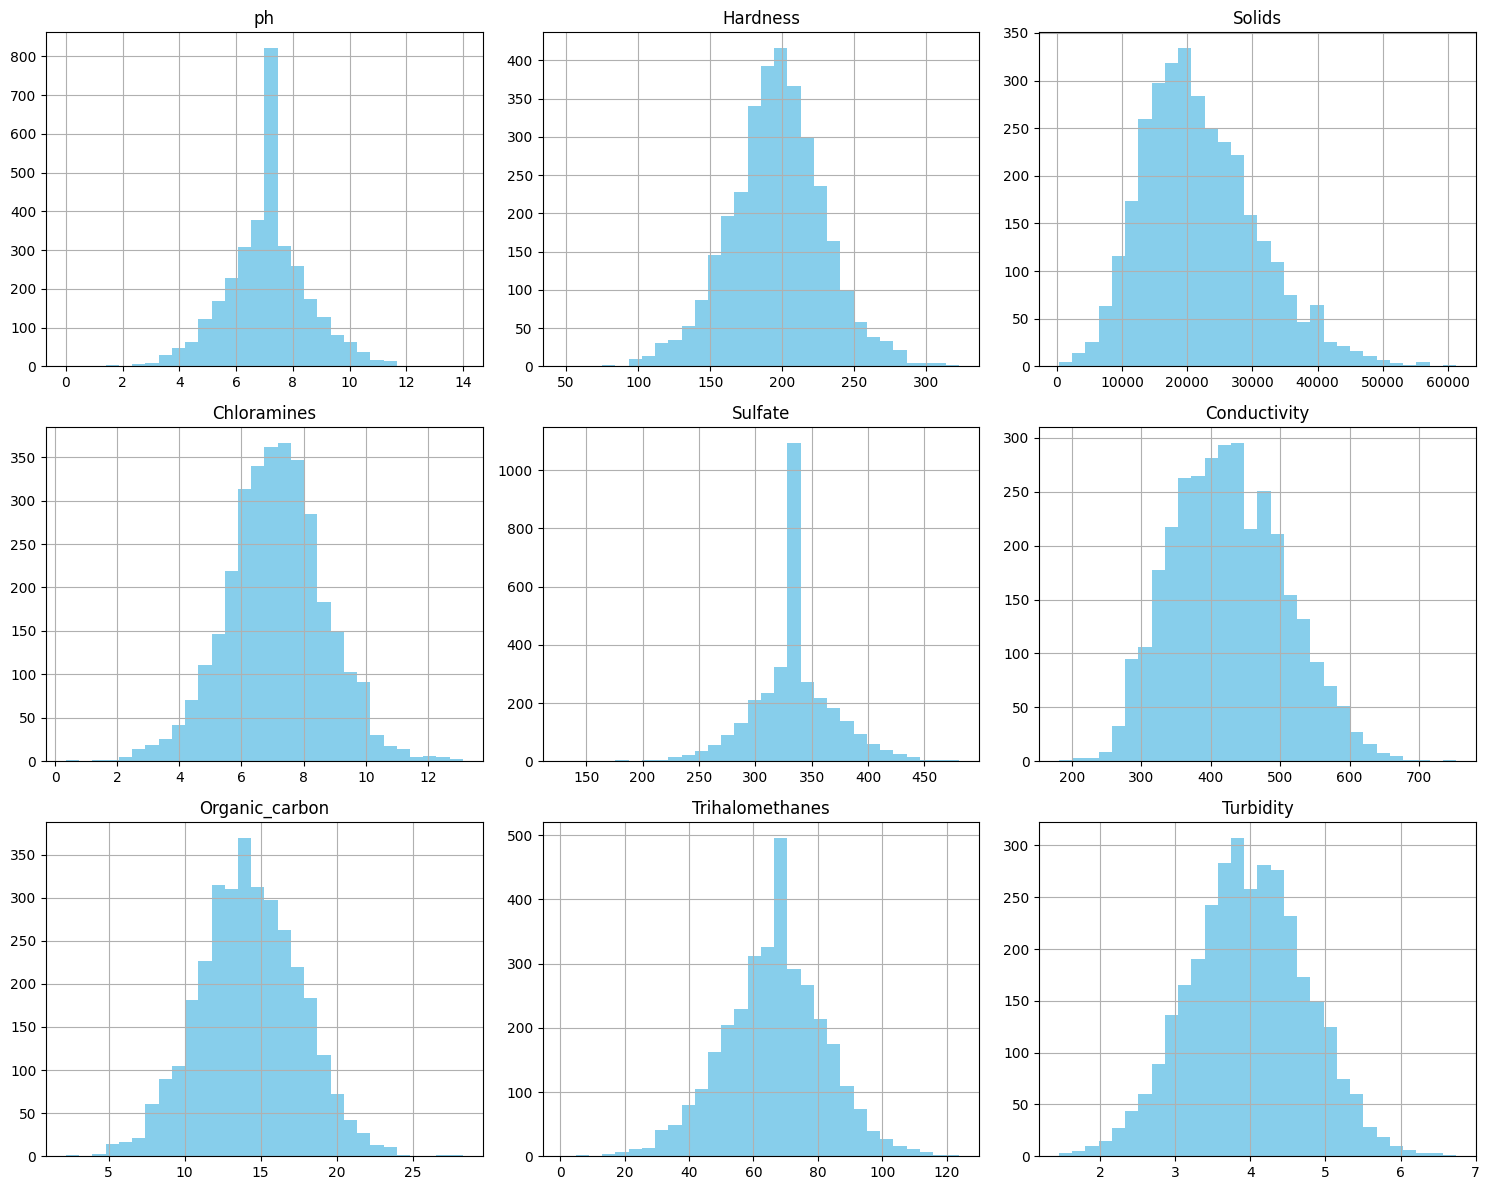

In [29]:
##Volvemos a validar los histogramas y boxplots para ver como quedaron los datos despues de la imputacion
numeric_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

df[numeric_cols].hist(bins=30, figsize=(15,12), color='skyblue')
plt.tight_layout()
plt.show()

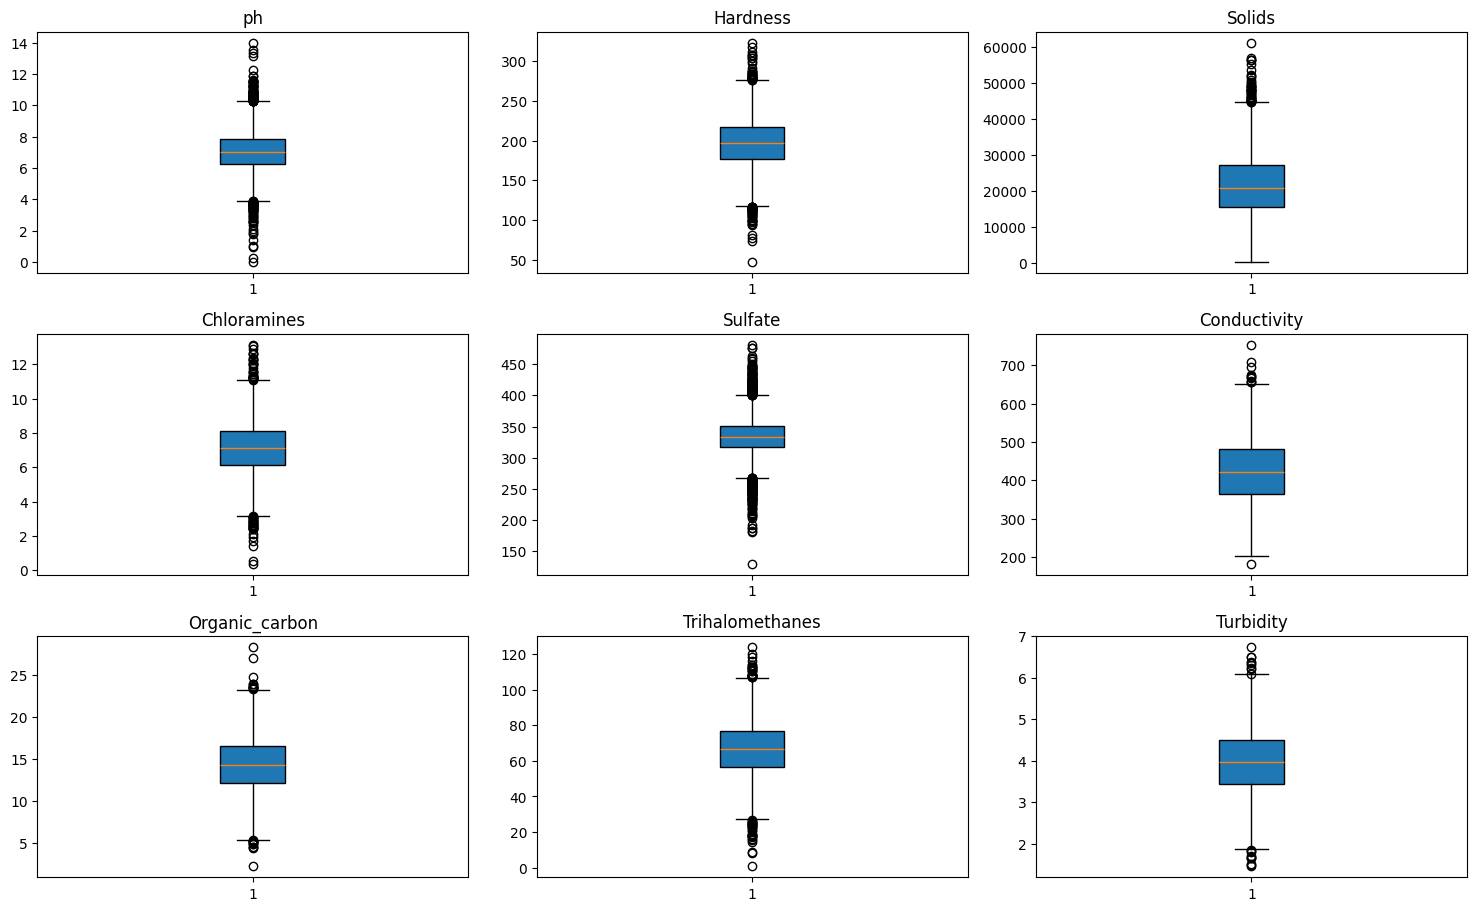

In [30]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)  # 4 filas, 3 columnas
    plt.boxplot(df[col], vert=True, patch_artist=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Se pueden evidenciar muchisimos valores extremos en Ph, Sulfato y Trihalomethanes